<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe2-MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de ordenamiento

**Entrada**: Arreglo de tamaño n con valores numéricos $[a_1,a_2,...,a_n]$

**Salida**: Arreglo de la forma: $[a_1',a_2',...,a_n']$, de modo que $a_1'\leq a_2' \leq... \leq a_n'$.

Ordenar una secuencia numérica es un problema bastante usual en el mundo de la informática. Puede parecer algo sencillo, sin embargo, debido a la gran cantidad de algoritmos que se han inventado para resolver este problema, existe un gran interés por determinar aquel que lo hace con mayor eficiencia.

En este contexto, **MergeSort** resulta uno de los mejores algoritmos a la hora 
de ordenar un arreglo numérico, ya que resuelve el problema en un tiempo considerablemente menor en comparación a otros. Este algoritmo se caracteriza por ocupar la técnica *divide y vencerás*, que consiste en dividir un problema en dos o más subproblemas más pequeños, luego los resuelve de manera **recursiva** y finalmente combina las soluciones para resolver el problema original.



# 2. MergeSort

## 2.1 Código

El siguiente código muestra una implementación recursiva del algoritmo **MergeSort**.

In [17]:
from termcolor import colored

c = 0 # Contador de comparaciones de la función merge
k = 0 # Contador de llamadas recursivas de la función merge_sort

def merge(A, p, q, r, verbose=False):
  global c
  i = p # Recorre subarreglo de la parte izquierda
  j = q + 1 # Recorre subarreglo de la parte derecha
  B = [] # Se insertan los elementos ordenados

  if verbose == True:
    print(f"Ordenando subarreglos {A[p:q+1]} y {A[q+1:r+1]} -> ", end='')

  # La iteración termina cuando se insertan todos los elementos de un subarreglo
  while i <= q and j <= r:
    c += 1
    if A[i] < A[j]:
      B.append(A[i])
      i += 1
    else:
      B.append(A[j])
      j += 1

  # Los elementos restantes del otro subarreglo se insertan directamente en B
  if i > q:
    c += r+1-j
    B = B + A[j:r+1] 
  else:
    c += q+1-i
    B = B + A[i:q+1]

  # Se copia el contenido de B en A[p..r]
  A[p:r+1] = B

  if verbose == True:
    print(B)
    print("Estado actual del arreglo: [", end='')

    if p != 0:
      print(str(A[:p])[1:-1] + ", ", end='')
    print(colored(f"{str(A[p:r+1])[1:-1]}", "magenta"), end='')

    if r + 1 != len(A):
      print(", " + str(A[r+1:])[1:-1], end='')
    print("]\n")

def merge_sort(A, p=0, r=None, verbose=False):
  global k

  if r == None:
    r = len(A) - 1

  if p == r: 
    return 0 # La secuencia tiene un solo elemento

  q = int((p + r)/2) # Elemento medio del arreglo
  if verbose == True:
    if (r - p + 1) == len(A):
      print(f"Arreglo de entrada: {A}\n")

    print("Dividiendo arreglo ", end='')
    print("[" + colored(f"{str(A[p:q+1])[1:-1]}, ", "red"), end='')
    print(colored(f"{str(A[q+1:r+1])[1:-1]}", "blue") + "] ", end='')
    print("en la posición q = " + str(q) + "\n")

  merge_sort(A, p, q, verbose) # Ordena la parte izquierda del arreglo
  merge_sort(A, q + 1, r, verbose) # Ordena la parte derecha del arreglo
  merge(A, p, q, r, verbose) # Combina y ordena ambos subarreglos ordenados
  k += 2 

  if verbose == True:
    if (r - p + 1) == len(A):
      print(f"Arreglo de salida: {A}")
  
# Ejemplo
A = [5,6,1,8,7,4]
print("Entrada: ", A)
cont = merge_sort(A)
print("Salida: ", A)
print("Comparaciones: ", c)
print("Llamadas recursivas: ", k)

Entrada:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Salida:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Comparaciones:  82
Llamadas recursivas:  36


## 2.2. Descripción del algoritmo

El algoritmo recibe como entrada un arreglo con la secuencia de números que queremos ordenar. Luego, el algoritmo ordena los números de menor a mayor y finalmente retorna el arreglo resultante. Los pasos realizados por el algoritmo son los siguientes:

1. Se divide el arreglo inicial por la mitad, luego, se repite este proceso de manera recursiva para cada subarreglo formado, hasta obtener pares de subarreglos con 1 solo elemento.

2. Cada par de subarreglos se reagrupa de manera ordenada. Para ello, se compara el primer elemento de cada par, y el menor de ellos se inserta en un nuevo arreglo auxiliar. Luego, el elemento insertado es descartado del subarreglo de origen. Se repite este proceso hasta insertar todos los elementos de un subarreglo.

3. Los elementos restantes de la otra secuencia, se copian directamente en el arreglo auxiliar.

4. Se copia el contenido del arreglo auxiliar en el subarreglo padre.

## 2.3. Ejemplo

Consideremos, por ejemplo, el arreglo:

$a=[5,1,4,8,2,6]$

Para empezar, debemos dividir este arreglo por la mitad, y repetir este paso con cada subarreglo hasta formar conjuntos de 1 solo elemento.

![picture](https://drive.google.com/uc?export=view&id=15yEpCCMyD3st5clyPoxc6snPbysvDlrQ)

Luego, se reagrupará cada par de subarreglos de manera ordenada comenzando desde el nivel más bajo.

![picture](https://drive.google.com/uc?export=view&id=1h1YkIgeU_v9C1z9rg2vq8noDYgJhxVNS)

Una vez reagrupados todos los subarreglos, se forma un nuevo arreglo $a'=[1,2,4,5,6,8]$ con los mismos elementos que el arreglo de entrada, pero dispuestos en orden creciente.



## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [11]:
import random
A = random.sample(range(1, 100), 6)
cont = merge_sort(A, verbose=True)

Arreglo de entrada: [95, 30, 60, 44, 16, 13]

Dividiendo arreglo [95, 30, 60, 44, 16, 13] en la posición q = 2

Dividiendo arreglo [95, 30, 60] en la posición q = 1

Dividiendo arreglo [95, 30] en la posición q = 0

Ordenando subarreglos [95] y [30] -> [30, 95]
Estado actual del arreglo: [30, 95, 60, 44, 16, 13]

Ordenando subarreglos [30, 95] y [60] -> [30, 60, 95]
Estado actual del arreglo: [30, 60, 95, 44, 16, 13]

Dividiendo arreglo [44, 16, 13] en la posición q = 4

Dividiendo arreglo [44, 16] en la posición q = 3

Ordenando subarreglos [44] y [16] -> [16, 44]
Estado actual del arreglo: [30, 60, 95, 16, 44, 13]

Ordenando subarreglos [16, 44] y [13] -> [13, 16, 44]
Estado actual del arreglo: [30, 60, 95, 13, 16, 44]

Ordenando subarreglos [30, 60, 95] y [13, 16, 44] -> [13, 16, 30, 44, 60, 95]
Estado actual del arreglo: [13, 16, 30, 44, 60, 95]

Arreglo de salida: [13, 16, 30, 44, 60, 95]


# 3. Correctitud

### **Teorema 1 (Correctitud de la función Merge).**

*La función **Merge** genera un arreglo: $[a_1',a_2',...,a_n']$, que contiene los mismos elementos de cada subarreglo de entrada ordenados de menor a mayor, es decir,* $a_1'\leq a_2' \leq... \leq a_n'$.

## Prueba del Teorema

Previamente observamos que la función Merge, en cada iteración, compara el primer elemento de cada subarreglo e inserta el menor de ellos en el arreglo de salida. A partir de esto, podemos formular la siguiente **propiedad invariante de bucle** para la función `Merge`:

> Al comienzo de cada iteración $i$, el arreglo de salida contiene $i-1$ elementos ordenados menores a los elementos restantes de cada subarreglo. El primer elemento restante de cada subarreglo corresponde al menor de su respectivo conjunto.

**Inicialización**

Al comienzo de la primera iteración (i=1), el arreglo de salida contiene $i - 1 = 0$ elementos, puesto que no han ocurrido inserciones. Como cada arreglo de entrada se encuentra inicialmente ordenado, podemos afirmar que el menor elemento de cada uno de ellos se encuentra en la primera posición, por lo cual se cumple la propiedad. 

**Mantención**

Para determinar si se mantiene la propiedad, asumiremos que en la iteración $i$, el siguiente elemento a insertar se encuentra al principio del primer subarreglo.

Por lo tanto, al finalizar la iteración y al comienzo de la siguiente, el arreglo de salida tendrá $i$ elementos ordenados.

Notemos que al descartar elementos en los subarreglos de entrada, el orden no se ve afectado, por lo cual el menor elemento, una vez eliminado el anterior, seguirá estando al principio. A partir de esto, podemos concluir que la invariante de bucle vuelve a cumplirse en la siguiente iteración.

**Correctitud**

Finalmente, como la propiedad de bucle invariante es verdadera al inicio del bucle y se mantiene en cada iteración, podemos decir que al **finalizar la n-ésima iteración del algoritmo**, se que genera un arreglo $[a_1',a_2',...,a_n']$, con los mismos elementos de cada subarreglo de entrada ordenados de menor a mayor. $\Box$


### **Teorema 2 (Correctitud del algoritmo MergeSort).**

*El algoritmo **MergeSort** genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir,* $a_1'\leq a_2' \leq... \leq a_n'$.

## Prueba del Teorema

Debido a la naturaleza recursiva de este algoritmo, usaremos inducción matemática para demostrar su correctitud. Para ello, consideraremos la hipótesis $P(n)$ como el teorema antes descrito.

**Caso base**

Para un tamaño de problema $n = 1$, la función retorna un único elemento trivialmente ordenado, por lo cual se cumple $P(1)$.

**Paso inductivo**

Para $n > 1$, el algoritmo divide el arreglo en dos subarreglos de tamaño $m = \frac{n}{2}$. Estos subarreglos son ordenados y combinados a partir de la función `merge`, la cual asumiremos que es correcta basándonos en las demostraciones anteriores. Como la hipótesis $P(m)$ es cierta para $m < n$, entonces también lo será para $P(n)$.$\Box$

# 4. Tiempo de ejecución

### **Teorema 3 (Tiempo de ejecución).**

*El algoritmo **MergeSort** tiene un **tiempo de ejecución de** $O(n\;log(n))$ en el peor caso.*

## Prueba del teorema

Para demostrar la complejidad del algoritmo MergeSort, utilizaremos un árbol de recursión. Para ello, primero debemos encontrar su función de recurrencia. En general, existen dos casos:

*   Para un tamaño de problema $n = 1$, el tiempo de ejecución $T(N)$ del algoritmo será constante, es decir, $T(N) = O(1)$
*   Para $n > 1$, el algoritmo dividirá el arreglo original en dos subarreglos de tamaño $n/2$. El tiempo que tardará el algoritmo en ordenar ambos subarreglos será $2T(N/2)$. Luego, la función merge se encargará de combinar ambas secuencias ordenadas en un único arreglo, en un tiempo de ejecución $C(n) = O(n)$. Por último, el tiempo que tarda el algoritmo en dividir el arreglo es constante, por lo tanto $D(n) = O(1)$. 

En consecuencia, la función de recurrencia queda expresada de la siguiente manera:

$T(n) =
     \begin{cases}
       \text{$O(1)$} &\quad\text{$n = 1$}\\
       \text{$2T(n/2) + O(n)$} &\quad\text{$n > 1$} \\ 
     \end{cases}
$

Luego, reemplazamos las complejidades $O(1)$ por una constante $c$ y las complejidades $O(n)$ por el termino $c \cdot n$.

$T(n) =
     \begin{cases}
       \text{$c$} &\quad\text{$n = 1$}\\
       \text{$2T(n/2) + c \cdot n$} &\quad\text{$n > 1$} \\ 
     \end{cases}
$

A partir de esta nueva función, podemos crear el siguiente árbol de recurrencia:

![picture](https://drive.google.com/uc?export=view&id=16YMmJrb0BO2pRkgPs-3EiPWinm65ASi0)

Notemos que cada nodo del árbol corresponde al coste de tiempo del algoritmo en procesar cada subarreglo. Luego, al expandir el árbol por completo, hasta $n = 1$, se tiene lo siguiente:

![picture](https://drive.google.com/uc?export=view&id=1NMn8k_i71uTJgl5NFqm-VPCpaJ-NY3rL)

Al sumar el tiempo de ejecución por cada nivel del árbol, siempre se obtendrá el resultado $cn$.

Por otro lado, la altura del árbol se calcula como $\log_{2} n$.

Al multiplicar ambos factores, obtenemos el resultado $cn \log_{2} n$, que representa el tiempo de ejecución total del algoritmo. La complejidad de esta función puede expresarse como $O(n\;log(n))$, que corresponde a la complejidad temporal de MergeSort.


# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* Cantidad de comparaciones del peor y del mejor caso calculadas matemáticamente.
* Cantidad de comparaciones realizadas experimentalmente para entradas aleatorias con $n \in [5,19]$.

Los arreglos de entrada son generados aleatoriamente con valores numéricos en el rango de 1 a 100.

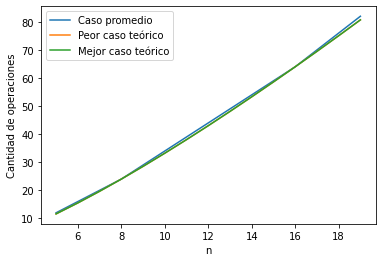

In [13]:
import matplotlib.pyplot as plt
import random
import math

x = [n for n in range(5,20)] 
y1 = [n * math.log2(n) for n in range(5,20)] # Peor caso
y2 = y1 # Mejor caso
y = []; 

for n in range(5,20):
    c = 0
    A = random.sample(range(1, 101), n)
    merge_sort(A)
    y.append(c)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Caso promedio", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel('n')
plt.ylabel('Cantidad de operaciones')
plt.show()

### Análisis de resultados

Podemos observar que la curva de comparaciones del caso promedio es similar a la curva del peor y del mejor caso. Sin embargo, existen pequeñas diferencias en algunos valores. Esto se debe a que las divisiones de los arreglos realizadas por el algoritmo podrían no ser exactas, lo cual afectaría mínimamente el número de comparaciones final. Por ejemplo, para $n = 3$, teóricamente el arreglo debería dividirse en dos subarreglos de tamaño $n = \frac{3}{2}.$ Sabemos que esto no es posible, por lo cual el número exacto de comparaciones del algoritmo solo coincidirá con la función $n\;log(n)$ cuando $n$ es una potencia de 2.

## 5.2 Comparación con InsertionSort

En primer lugar, definiremos una nueva función para ordenar los datos mediante el algoritmo InsertionSort.

In [18]:
def insertion_sort(A, verbose=False):
    n = len(A)
    t = 0 # Contador de comparaciones

    for i in range(1, n):
        j = i # Variable auxiliar usada para recorrer el arreglo hacia atrás
        t += 1 # Se realiza la primera comparación
        
        # Si el elemento es menor al anterior se intercambian
        while A[j] < A[j - 1]:
            A[j], A[j - 1] = A[j - 1], A[j]
            j -= 1

            if j == 0: break

            t += 1 # Luego del intercambio debe realizarse una nueva comparación

    return A, t

A continuación, se muestra la comparación del tiempo de ejecución de ambos algoritmos al utilizar como entrada arreglos generados de forma aleatoria, con $n \in [5,500]$ y valores en el rango de 1 a 1000.

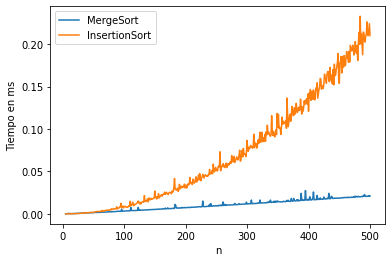

In [16]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y1=[]; y2=[];

for n in range(5,501):

    A = random.sample(range(1, 1001), n)

    # La función repeat ejecuta 20 veces el algoritmo con el arreglo A y retorna el mejor tiempo obtenido.
    t_merge = repeat(setup="from __main__ import merge_sort", stmt=f"merge_sort({A})", repeat=1, number=10)
    t_insert = repeat(setup="from __main__ import insertion_sort", stmt=f"insertion_sort({A})", repeat=1, number=10)

    x.append(n)
    y1.append(t_merge)
    y2.append(t_insert)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MergeSort", "InsertionSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Como se puede apreciar, el tiempo de ejecución de InsertionSort aumenta en forma cuadrática en relación al tamaño del problema, lo cual coincide con la complejidad temporal de este algoritmo, la cual es $O(n^2)$. Del mismo modo, la curva de tiempo de MergeSort crece en relación a su complejidad, la cual es $O(n\;log(n))$.

En base a esto, podemos observar que para tamaños grandes de $n$, el algoritmo MergeSort resuelve el problema de ordenamiento con una eficiencia significativamente mayor a la de InsertionSort. 

